# **PROJECT MEMBERS:**
### **M.TAHA KHAN (Fa22/2230-0041/BS-AI)**
### **M. Danial Masood (Fa22/2230-0040/BS-AI)**
### **Arfa Batool (Fa22/2230-0036/BS-AI)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

**Displaying The DataSet**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/PROJECT/Tweets.csv")
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


**We only need text sentiment for our Project**

In [4]:
review_df = df[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

**We don’t really need neutral reviews in our dataset for this binary classification problem. So, drop those rows from the dataset**

In [6]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']

print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


**Checking the values of the airline_sentiment column**

In [7]:
review_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

**converting the categorical values to numeric using the factorize() method.**

In [8]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

**The 0 here represents positive sentiment and the 1 represents negative sentiment.**

**We should transform our text data into something that our machine learning model understands. Basically, we need to convert the text into an array of vector embeddings. Word embeddings are a beautiful way of representing the relationship between the words in the text.**


**To do this, we first give each of the unique words a unique number and then replace that word with the number assigned.**


**First, retrieve all the text data from the dataset.**

In [9]:
tweet = review_df.text.values

 **let’s tokenize all the words in the text with the help of Tokenizer.In tokenization, we break down all the words/sentences of a text into small parts called tokens.**

In [10]:
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)


**The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.**

**replace the words with their assigned numbers using the text_to_sequence() method.**

In [11]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

**Each of the sentences in the dataset is not of equal length. Using padding to pad the sentences to have equal length.**

In [12]:
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

**For this project, we use LSTM layers in the machine learning model. The architecture of our model consists of an embedding layer, an LSTM layer, and a Dense layer at the end. To avoid overfitting, we introduced the Dropout mechanism in-between the LSTM layers.**

**LSTM stands for Long Short Term Memory Networks. It is a variant of Recurrent Neural Networks. Recurrent Neural Networks are usually used with sequential data such as text and audio. Usually, while computing an embedding matrix, the meaning of every word and its calculations (which are called hidden states) are stored. If the reference of a word, let’s say a word is used after 100 words in a text, then all these calculations RNNs cannot store in its memory. That’s why RNNs are not capable of learning these long-term dependencies.**

**LSTMs on the other hand work well with such text. LSTM networks work well with time-series data.**

**Dropout is one of the regularization techniques. It is used to avoid overfitting. In the dropout mechanism, we drop some neurons randomly. The layer takes an argument, a number between 0 and 1 that represents the probability to drop the neurons. This creates a robust model avoiding overfitting.**

In [13]:
embedding_vector_length = 32
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440139 (1.68 MB)
Trainable params: 440139 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

**Training the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%**

In [14]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 90s 298ms/step - loss: 0.4127 - accuracy: 0.8287 - val_loss: 0.2111 - val_accuracy: 0.9212
Epoch 2/5
289/289 [==============================] - 89s 306ms/step - loss: 0.2178 - accuracy: 0.9177 - val_loss: 0.1671 - val_accuracy: 0.9398
Epoch 3/5
289/289 [==============================] - 84s 290ms/step - loss: 0.1666 - accuracy: 0.9399 - val_loss: 0.1671 - val_accuracy: 0.9428
Epoch 4/5
289/289 [==============================] - 86s 298ms/step - loss: 0.1320 - accuracy: 0.9496 - val_loss: 0.1812 - val_accuracy: 0.9407
Epoch 5/5
289/289 [==============================] - 84s 290ms/step - loss: 0.1140 - accuracy: 0.9581 - val_loss: 0.1841 - val_accuracy: 0.9454


**The python sentiment analysis model obtained 96% accuracy on the training set and 94.33% accuracy on the test set.**

**ploting these metrics using the matplotlib.**

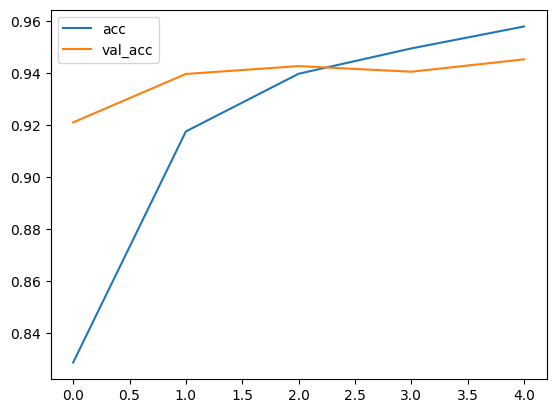

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

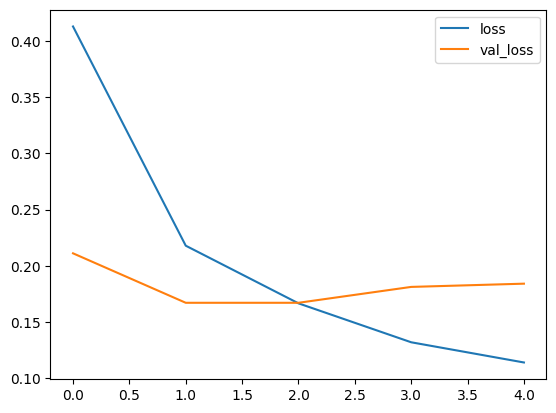

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

### **Executing sentiment analysis model**

In [17]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = input("Enter a Sentiment: ")
predict_sentiment(test_sentence1)


Enter a Sentiment: today was a great day
1/1 [==============================] - 0s 472ms/step
Predicted label:  positive
